In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import splat
import numpy
import astropy.units as u
from astropy import constants as const 
import copy
from scipy.integrate import trapz        # for numerical integration
from scipy.interpolate import interp1d
from tqdm import tqdm
import kastredux
import glob
%matplotlib inline

Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
f='/users/caganze/research/J1624/data/kastBLUE_J1624-3212_20200722.fits'
fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20200722.fits'

In [22]:
s=kastredux.readSpectrum(f)
sred=kastredux.readSpectrum(fr)
#stich spectra
total_flux=np.concatenate([s.flux, sred.flux])
total_wave=np.concatenate([s.wave, sred.wave])
total_noise=np.concatenate([s.variance, sred.variance])

#total_noise=np.concatenate([s.noise, sred.noise])
sp= kastredux.Spectrum(wave=total_wave, flux=total_flux, noise=total_noise, name='J1624')

In [23]:
sred.variance

<Quantity [4.97027244e-31, 4.86606735e-31, 4.72746408e-31, ...,
           2.95399608e-29, 2.96201823e-29, 2.97008247e-29] erg2 / (Angstrom2 cm4 s2)>

In [4]:
#kastredux.Spectrum(filename=f)

In [24]:
std_files=glob.glob('/users/caganze/research/kastredux/kastredux/resources/spectral_standards/*.txt')

In [25]:
stds=[kastredux.readSpectrum(f) for f in std_files]

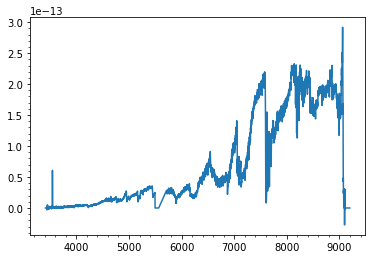

In [26]:
fig, ax=plt.subplots()
plt.plot(sp.wave, sp.flux)
#plt.plot(sred.wave, sred.flux)
#plt.yscale('log')
plt.minorticks_on()

In [27]:

#stiched= sred.stich(s)

In [28]:
#sp.dof

In [29]:
fitrange=[4000, 8700]
sred.normalize(rng=fitrange)


In [30]:
chisqs=[list(kastredux.compareSpectra(sp,x,fit_range=fitrange,
               fitcycle=100,sclip=5.,plot=False)) for x in tqdm(stds)]

100%|██████████| 164/164 [00:07<00:00, 20.78it/s]


In [31]:
best_arg=np.argmin(np.array(chisqs)[:,0])

In [32]:
best= stds[best_arg]

In [33]:
top_best= np.argsort(np.array(chisqs)[:,0])[:5]

In [34]:
top_files=np.array(std_files)[top_best]
top_labels=[x.split('/')[-1].split('.txt')[0] for x in top_files]

In [35]:
def simple_plot(s, stand, label):
    chi, scale= kastredux.compareSpectra(s,stand,fit_range=fitrange,
               fitcycle=15)
    fig, ax=plt.subplots()
    ax.step(s.wave, s.flux, label='J1624')
    ax.step(stand.wave, stand.flux*scale, label=label)
    #ax.step(s.wave, s.noise)
    ax.legend()
    
    

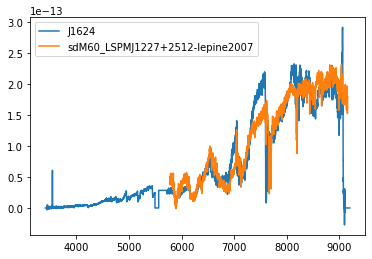

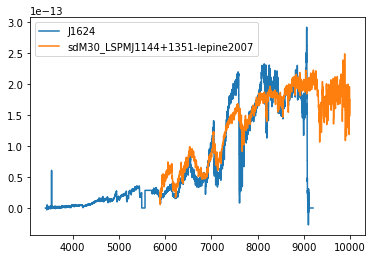

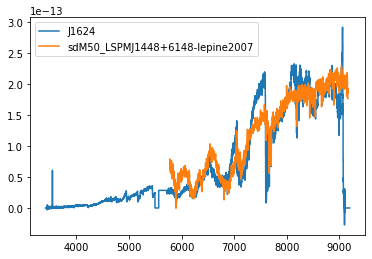

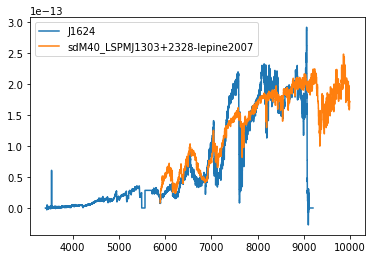

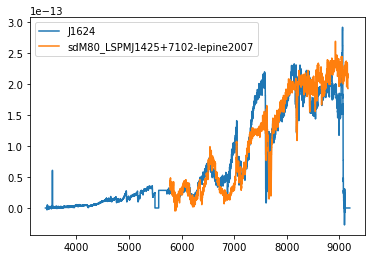

In [36]:
for idx in np.arange(len(top_best)):
    simple_plot(sp, stds[top_best[idx]], top_labels[idx])

In [37]:
def get_spectral_types(fil):
    return splat.typeToNum(fil.split('/')[-1].split('_')[0])

num_spts=[get_spectral_types(x) for x in std_files]
chis=np.array(chisqs)[:,0]

In [38]:
splat.weightedMeanVar(num_spts, chis, method = 'ftest', dof=len(s.wave))

(14.820663817402007, 1.4619214460908077)